## Producto privado en Qubits
El producto privado para qubits no tiene mucho misterio, se simplifica a la variación de los distintos estas de bell para dimensión 2:
$$\left|\varphi_{00}\right> = \frac{\left|00\right> + \left|11\right>}{\sqrt{2}} \ \ \ \ \ \left|\varphi_{01}\right> = \frac{\left|00\right> - \left|11 \right>}{\sqrt{2}}$$
$$\left|\varphi_{10}\right> = \frac{\left|10\right> + \left|01\right>}{\sqrt{2}} \ \ \ \ \ \left|\varphi_{11}\right> = \frac{\left|10\right> - \left|01 \right>}{\sqrt{2}}$$

Los **encondings** a realizar se reducirían a las puertas I, X, Z:

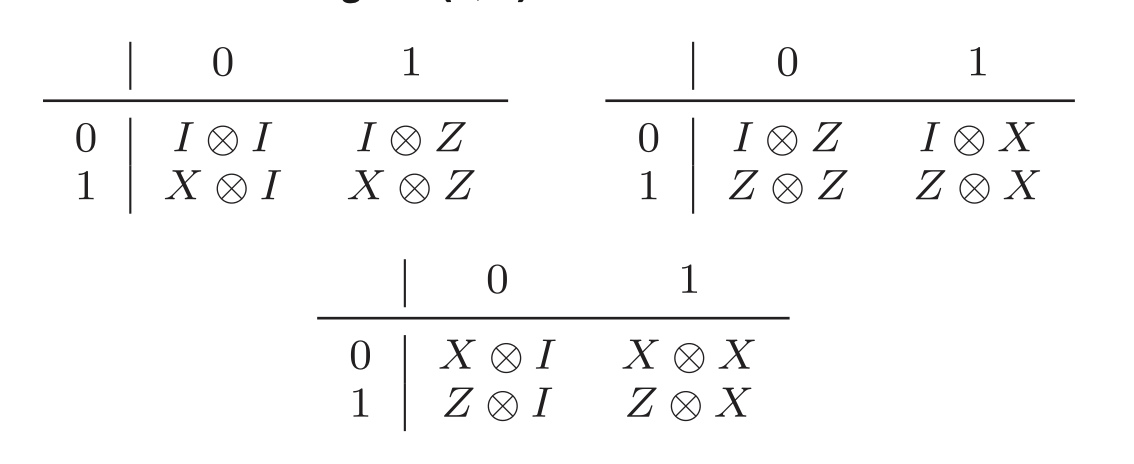

$$ I = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right)\ \ \ \ \ \ \ \ X = \sigma_x = \left(\begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}\right) \ \ \ \ \ \ \ \ Z = \sigma_z = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array}\right)$$

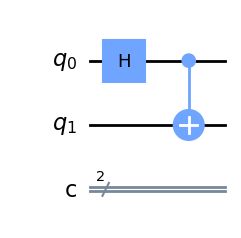

In [43]:
# Importo todo de qiskit
from qiskit import *
from qiskit.tools.visualization import  plot_histogram
from qiskit.quantum_info.operators import Operator
from funciones.U_function import U_gate
from funciones.R_function import R_gate
import numpy as np

a=0
b=1

qc = QuantumCircuit(2,2)
qc_2 = QuantumCircuit(2,2)

# Entrelazamineto cuántico
qc.h(0)
qc.cx(0,1)

qc.draw('mpl')

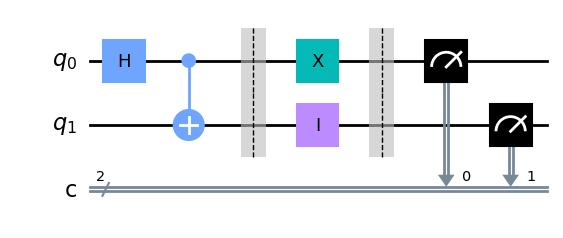

In [44]:
# Creo una matriz Identidad 2x2
I = np.identity(2)
I = Operator(I)

qc.barrier()

qc.x(0)
qc.unitary(I, [1], label="I")

qc.barrier()

qc.measure([0,1],[0,1])

qc.draw('mpl')


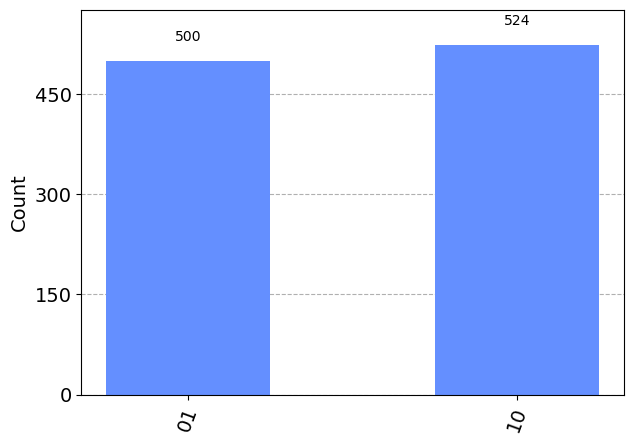

In [45]:
# Importo el simulador de Qiskit:
simulador = Aer.get_backend('qasm_simulator')

#Ejecutamos el circuito 1024 veces y cogemos sus resultados:
resultados = execute(qc, backend = simulador, shots = 1024).result()

# Cogemos las cuentas del circuito:
cuentas = resultados.get_counts()

plot_histogram(cuentas)